## Evaluation of solution scattering data from macromolecules with known atomic structure

#### Abstract
The horse in motion (1878) is considered the first motion photography ever produced, in order to answer the scientific question of whether all four hooves of a horse is ever off the ground at the same time while it’s galloping. Similarly, in the molecular world, the single static representation of macromolecules, such as proteins, was the first way of viewing such structures. However, a static picture is inadequate when describing the dynamics of a protein, which is essential to the performance of its biological function.

Recent developments of X-ray scattering techniques allow us to measure protein dynamics and intermediates in solution. By combining Molecular Dynamics simulations with experimental WAXS difference curves, we can fit the most likely tertiary structures that represent this data.

This requires developing a software suite for TR-WAXS data analysis. Experiments are performed at various x-ray sources and can differ in methodology. The project aims to develop a standardized method for the data analysis of experimental data.

Finally, for membrane proteins, the presence of the micelle adds to the difference scattering effects which are difficult to model. Therefore, as part of my project for my PhD involves developing theoretical models that can correctly describe the micelle.

#### Aim of this notebook
As part of structural modeling, a ground and excited state of a given light-activated rhodopsin protein is used, and rigid-body interpolations are created by using the ground and excited state for the protein. Theoretical scattering is calculated of the ground state and 25 different interpolations using a software named CRYSOL. The different interpolations are scored against the experimental data in order to make strucutral conlusions of and how the protein moves between intermediates over time. This script will load the output data from CRYSOL from all interpolations, concatenate,  calculate difference between ground state and a given interpolation and plot the difference scattering. Each individual interpolation will be plotted in one graph for comparison, and a second figure will plot the the mean difference scattering of all interpolations.

 ![title](Images/the-horse-in-motion.jpg)

### Import Packages

In [1]:
import numpy as np #will be used to perform element-wise subtraction between protein interpolations and the groundstate 
import pandas as pd # used to load and manipulate the input data and separate out columns from the input data into separate variables
import matplotlib.pyplot as plt #used to plot the data and create figures
import glob # The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell.

### Reading in interpolation scattering data from CRYSOL

Because we have 25 different interpolations, we need to load all the files in. Here we use glob to find the 
files using a pattern, which allows it to find all the 25 interpolation files. 

In [2]:
from glob import glob

interpolations = glob("data/interp_*.int")

interpolations.sort()

interpolations


['data/interp_001.int',
 'data/interp_002.int',
 'data/interp_003.int',
 'data/interp_004.int',
 'data/interp_005.int',
 'data/interp_006.int',
 'data/interp_007.int',
 'data/interp_008.int',
 'data/interp_009.int',
 'data/interp_010.int',
 'data/interp_011.int',
 'data/interp_012.int',
 'data/interp_013.int',
 'data/interp_014.int',
 'data/interp_015.int',
 'data/interp_016.int',
 'data/interp_017.int',
 'data/interp_018.int',
 'data/interp_019.int',
 'data/interp_020.int',
 'data/interp_021.int',
 'data/interp_022.int',
 'data/interp_023.int',
 'data/interp_024.int',
 'data/interp_025.int']

### Extract Total scattering (2nd column) from each interpolation and concatenate them.

The interpolation files have an .int extension, which is an abbreviation for intensity. The file type however is ASCII. Each file consists of five columns, which contain: (1) experimental scattering vector in inverse angstroms, (2) theoretical intensity in solution, (3) in vacuo, (4) the solvent scattering and (5) the border layer scattering. However, we are only interested in the first 3, and so we are going to extract each column into separate variables.

In [38]:
import pandas as pd

# We are an empty dataframe which we call int_tscatt (Interpolations Total Scattering) and filling that dataframe
# with the second column from each interpolation file into 25 dataframes. 
int_tscatt = []
for f in interpolations:
    int_tscatt.append(pd.read_csv(f, engine='python',skiprows=1,usecols=[1], header=None, delim_whitespace=True,
                                     names=['Total_Scattering']))

# We take the 25 dataframes and put them together in the second dimension so that we get a table with 201 rows
# and 25 columns, where each column is the total scattering for a given interpolation. 

int_tscatt_frame = pd.concat(int_tscatt, axis=1, ignore_index=True)

int_tscatt_frame

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,20433400.0,20433400.0,20433400.0,20433400.0,20433400.0,20433400.0,20433400.0,20433400.0,20433400.0,20433400.0,...,20433400.0,20433400.0,20433400.0,20433400.0,20433400.0,20433400.0,20433400.0,20433400.0,20433400.0,20433400.0
1,20176300.0,20182200.0,20178700.0,20180000.0,20176400.0,20170600.0,20170600.0,20180500.0,20180500.0,20181000.0,...,20177900.0,20174000.0,20176800.0,20180200.0,20178200.0,20181500.0,20176800.0,20178000.0,20182700.0,20177800.0
2,19430900.0,19453900.0,19440200.0,19445100.0,19431400.0,19408800.0,19408800.0,19447200.0,19447200.0,19449200.0,...,19437100.0,19422100.0,19433000.0,19446200.0,19438200.0,19451200.0,19433000.0,19437700.0,19455700.0,19436900.0
3,18248200.0,18297400.0,18268000.0,18278500.0,18249300.0,18201100.0,18201100.0,18283000.0,18283000.0,18287200.0,...,18261400.0,18229400.0,18252700.0,18280800.0,18263800.0,18291600.0,18252600.0,18262600.0,18301300.0,18260900.0
4,16710100.0,16792100.0,16743000.0,16760300.0,16712100.0,16632900.0,16632900.0,16768000.0,16768000.0,16775000.0,...,16731900.0,16679200.0,16717500.0,16764300.0,16736000.0,16782300.0,16717400.0,16734100.0,16798600.0,16731300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,21810.4,21591.4,21911.3,21733.7,21928.7,21994.1,21994.1,21929.4,21929.4,21757.6,...,21922.2,21908.6,21921.0,21765.0,21654.4,21434.2,21956.6,21854.0,22128.3,21877.3
197,21618.7,21419.1,21749.1,21629.2,21707.9,21902.8,21902.8,21787.0,21787.0,21630.3,...,21782.0,21772.7,21708.5,21644.5,21519.5,21311.4,21785.5,21660.2,22007.9,21674.1
198,21453.0,21287.8,21619.7,21580.0,21518.2,21829.8,21829.8,21694.7,21694.7,21548.7,...,21659.3,21684.1,21525.8,21578.7,21422.4,21238.8,21638.3,21498.4,21913.4,21502.6
199,21316.2,21197.5,21521.3,21580.2,21364.3,21765.0,21765.0,21649.3,21649.3,21511.8,...,21553.6,21634.5,21378.7,21563.0,21361.9,21215.3,21517.9,21370.5,21842.4,21366.2


### Extract theoretical scattering in vacuo scattering (3rd column) from each interpolation and concatenate them.

In [36]:
# The same process is applied here, however, this time we use the 3rd column from each interpolation file.
# This column contains the theoretical vacuum scattering of each interpolation.

int_vscatt = []
for f in interpolations:
    int_vscatt.append(pd.read_csv(f, engine='python',skiprows=1,usecols=[2], header=None, delim_whitespace=True,
                                     names=['Vacuum_Scattering']))

# Again, the result is a matrix or a table which has the dimensions of 201 x 25     
int_vscatt_frame = pd.concat(int_vscatt, axis=1, ignore_index=True)

int_vscatt_frame

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,185121000.0,185121000.0,185121000.0,185121000.0,185121000.0,185121000.0,185121000.0,185121000.0,185121000.0,185121000.0,...,185121000.0,185121000.0,185121000.0,185121000.0,185121000.0,185121000.0,185121000.0,185121000.0,185121000.0,185121000.0
1,182878000.0,182926000.0,182897000.0,182908000.0,182879000.0,182832000.0,182832000.0,182912000.0,182912000.0,182916000.0,...,182891000.0,182860000.0,182882000.0,182910000.0,182894000.0,182921000.0,182882000.0,182892000.0,182930000.0,182891000.0
2,176372000.0,176560000.0,176448000.0,176489000.0,176378000.0,176195000.0,176195000.0,176505000.0,176505000.0,176520000.0,...,176422000.0,176303000.0,176390000.0,176498000.0,176434000.0,176540000.0,176389000.0,176428000.0,176574000.0,176422000.0
3,166026000.0,166428000.0,166190000.0,166277000.0,166039000.0,165650000.0,165650000.0,166311000.0,166311000.0,166344000.0,...,166132000.0,165880000.0,166065000.0,166295000.0,166160000.0,166386000.0,166063000.0,166147000.0,166459000.0,166133000.0
4,152528000.0,153199000.0,152800000.0,152945000.0,152550000.0,151911000.0,151911000.0,153001000.0,153001000.0,153056000.0,...,152704000.0,152288000.0,152593000.0,152975000.0,152750000.0,153128000.0,152589000.0,152729000.0,153251000.0,152706000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,41658.7,41499.5,41638.2,41150.1,41983.9,41582.2,41582.2,41930.1,41930.1,41860.7,...,41773.6,41917.3,41966.8,41341.5,40984.1,40963.1,41968.9,41654.1,42095.8,41737.1
197,41052.2,40916.2,41097.5,40691.6,41336.7,41146.4,41146.4,41414.1,41414.1,41359.0,...,41256.0,41408.6,41329.4,40858.7,40477.8,40448.0,41392.0,41062.4,41608.8,41127.8
198,40491.3,40400.4,40610.3,40321.2,40744.7,40743.3,40743.3,40978.4,40978.4,40932.2,...,40767.6,40977.4,40743.6,40463.2,40031.3,40014.4,40857.0,40521.9,41167.8,40569.1
199,39982.3,39953.1,40173.8,40029.7,40216.1,40356.7,40356.7,40617.8,40617.8,40578.3,...,40308.6,40610.2,40219.5,40147.8,39643.6,39661.9,40370.1,40035.7,40769.8,40066.9


### Extract experimental scattering vector in inverse angstroms (q^-1) from 1st column 

In [239]:
# The value for the experimental scattering vector is the same for all files. This represents how far out from 
# the center of the "detector" that we will include in out data. Solution scattering data for macro molecules
# does not have a high resolution, and does not scatter at high angles.

q_frame = pd.read_csv(f, engine='python',skiprows=1,usecols=[0], header=None, delim_whitespace=True,
                                     names=['Inverse_q'])

q_frame

,Inverse_q
0,0.00
1,0.01
2,0.02
3,0.03
4,0.04
...,...
196,1.96
197,1.97
198,1.98
199,1.99


### Image showing all interpolations superimposed

This image shows all 25 interpolations superimposed. You can see that only certain regions have been moved and 
other regions of the protein are perfectly aligned. We can know which regions that move when comparing a ground state
and an excited state of a given protein. The tricky part is to know exactly how large this movement is when you have a
time-resolved experiment with multiple time-points. 

![title](Images/SRII_HtrII_interpolations_white.png)

### Reading in theoretical intensity in solution (2nd column) for SRII-HtrII groundstate

Loading in theoretical scattering data for the ground state. It is only one file, and therefore a loop is not required
instead we just use pandas read_csv function to load this data. 

In [53]:
ground_tscatt = pd.read_csv("data/SRII_HtrII_ground_edited_ALIGNED00.int",engine='python',skiprows=1,usecols=[1], header=None, delim_whitespace=True)
                                  #names=['Total_Scattering'])

ground_tscatt

,1
0,20433400.0
1,20182100.0
2,19453300.0
3,18296100.0
4,16789900.0
...,...
196,21779.2
197,21619.3
198,21477.5
199,21354.8


### Reading in theoretical intensity in vacuo (3rd column) for SRII-HtrII groundstate

Loading in theoretical scattering data for the ground state. It is only one file, and therefore a loop is not required
instead we just use pandas read_csv function to load this data. 

In [54]:
ground_vscatt = pd.read_csv("data/SRII_HtrII_ground_edited_ALIGNED00.int",engine='python',skiprows=1,usecols=[2], header=None, delim_whitespace=True)
                                  #names=['Vacuum_Scattering'])

ground_vscatt

,2
0,185121000.0
1,182924000.0
2,176551000.0
3,166409000.0
4,153166000.0
...,...
196,42171.1
197,41603.4
198,41069.6
199,40571.3


### Image showing SRII-HtrII groundstate

![title](Images/SRII_ground_chimera.png)

### Calculate difference scattering between intermediates and groundstate for theoretical solution scattering.

The differnce scattering between a given interpolation and the groundstate, gives a fingerprint for a given 
structural movement. This is also the case with the experimental data, were each time-point is the difference between that intermediate in time and the ground state. 

In [240]:
# numpy is used to perform element-wise subtraction; intermediate - ground. We call this variable dItS 
# (difference intensity total scattering)

dItS = np.subtract(int_tscatt_frame,ground_tscatt)
dItS

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-5800.0,100.0,-3400.0,-2100.0,-5700.0,-11500.0,-11500.0,-1600.0,-1600.0,-1100.0,...,-4200.0,-8100.0,-5300.0,-1900.0,-3900.0,-600.0,-5300.0,-4100.0,600.0,-4300.0
2,-22400.0,600.0,-13100.0,-8200.0,-21900.0,-44500.0,-44500.0,-6100.0,-6100.0,-4100.0,...,-16200.0,-31200.0,-20300.0,-7100.0,-15100.0,-2100.0,-20300.0,-15600.0,2400.0,-16400.0
3,-47900.0,1300.0,-28100.0,-17600.0,-46800.0,-95000.0,-95000.0,-13100.0,-13100.0,-8900.0,...,-34700.0,-66700.0,-43400.0,-15300.0,-32300.0,-4500.0,-43500.0,-33500.0,5200.0,-35200.0
4,-79800.0,2200.0,-46900.0,-29600.0,-77800.0,-157000.0,-157000.0,-21900.0,-21900.0,-14900.0,...,-58000.0,-110700.0,-72400.0,-25600.0,-53900.0,-7600.0,-72500.0,-55800.0,8700.0,-58600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,31.2,-187.8,132.1,-45.5,149.5,214.9,214.9,150.2,150.2,-21.6,...,143.0,129.4,141.8,-14.2,-124.8,-345.0,177.4,74.8,349.1,98.1
197,-0.6,-200.2,129.8,9.9,88.6,283.5,283.5,167.7,167.7,11.0,...,162.7,153.4,89.2,25.2,-99.8,-307.9,166.2,40.9,388.6,54.8
198,-24.5,-189.7,142.2,102.5,40.7,352.3,352.3,217.2,217.2,71.2,...,181.8,206.6,48.3,101.2,-55.1,-238.7,160.8,20.9,435.9,25.1
199,-38.6,-157.3,166.5,225.4,9.5,410.2,410.2,294.5,294.5,157.0,...,198.8,279.7,23.9,208.2,7.1,-139.5,163.1,15.7,487.6,11.4


### Calculate difference scattering between intermidiates and groundstate for theoretical in vacuo scattering.

In [63]:
# numpy is used to perform element-wise subtraction; intermediate - ground. We call this variable dItS 
# (difference intensity vacuum scattering)

dIvS = np.subtract(int_vscatt_frame,ground_vscatt)
dIvS

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-46000.0,2000.0,-27000.0,-16000.0,-45000.0,-92000.0,-92000.0,-12000.0,-12000.0,-8000.0,...,-33000.0,-64000.0,-42000.0,-14000.0,-30000.0,-3000.0,-42000.0,-32000.0,6000.0,-33000.0
2,-179000.0,9000.0,-103000.0,-62000.0,-173000.0,-356000.0,-356000.0,-46000.0,-46000.0,-31000.0,...,-129000.0,-248000.0,-161000.0,-53000.0,-117000.0,-11000.0,-162000.0,-123000.0,23000.0,-129000.0
3,-383000.0,19000.0,-219000.0,-132000.0,-370000.0,-759000.0,-759000.0,-98000.0,-98000.0,-65000.0,...,-277000.0,-529000.0,-344000.0,-114000.0,-249000.0,-23000.0,-346000.0,-262000.0,50000.0,-276000.0
4,-638000.0,33000.0,-366000.0,-221000.0,-616000.0,-1255000.0,-1255000.0,-165000.0,-165000.0,-110000.0,...,-462000.0,-878000.0,-573000.0,-191000.0,-416000.0,-38000.0,-577000.0,-437000.0,85000.0,-460000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-512.4,-671.6,-532.9,-1021.0,-187.2,-588.9,-588.9,-241.0,-241.0,-310.4,...,-397.5,-253.8,-204.3,-829.6,-1187.0,-1208.0,-202.2,-517.0,-75.3,-434.0
197,-551.2,-687.2,-505.9,-911.8,-266.7,-457.0,-457.0,-189.3,-189.3,-244.4,...,-347.4,-194.8,-274.0,-744.7,-1125.6,-1155.4,-211.4,-541.0,5.4,-475.6
198,-578.3,-669.2,-459.3,-748.4,-324.9,-326.3,-326.3,-91.2,-91.2,-137.4,...,-302.0,-92.2,-326.0,-606.4,-1038.3,-1055.2,-212.6,-547.7,98.2,-500.5
199,-589.0,-618.2,-397.5,-541.6,-355.2,-214.6,-214.6,46.5,46.5,7.0,...,-262.7,38.9,-351.8,-423.5,-927.7,-909.4,-201.2,-535.6,198.5,-504.4


### Plotting difference scattering for theoretical solution and in vacuo scattering for all interpolations

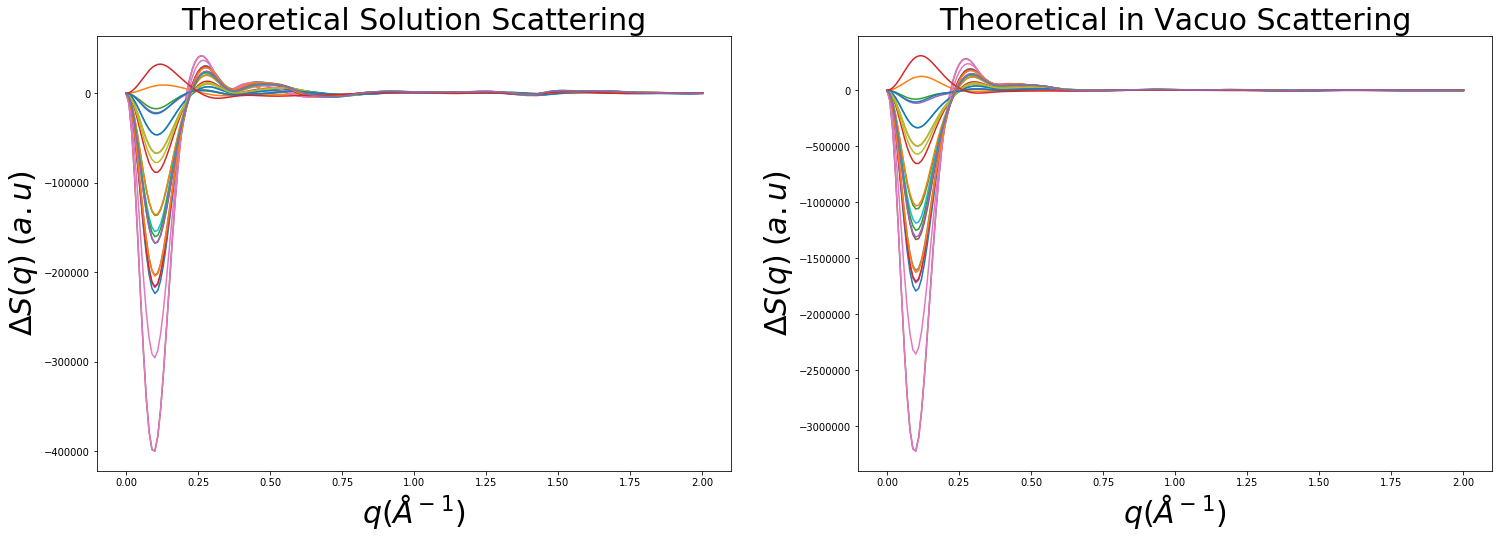

In [237]:
fig = plt.figure(figsize=(25,8))

ax = fig.add_subplot(121)
plt.plot(q_frame,dItS)
plt.xlabel('$q(Å{^-}^{1})$', fontsize=30)
plt.ylabel('$\Delta S(q)\;(a.u)$',fontsize=30)
plt.title('Theoretical Solution Scattering',fontsize=30)

ax = fig.add_subplot(122)
plt.plot(q_frame,dIvS)
plt.xlabel('$q(Å{^-}^{1})$',fontsize=30)
plt.ylabel('$\Delta S(q)\;(a.u)$',fontsize=30);
plt.title('Theoretical in Vacuo Scattering',fontsize=30)

plt.savefig('test_25_interpolations_diff_scatt.png',dpi=300)

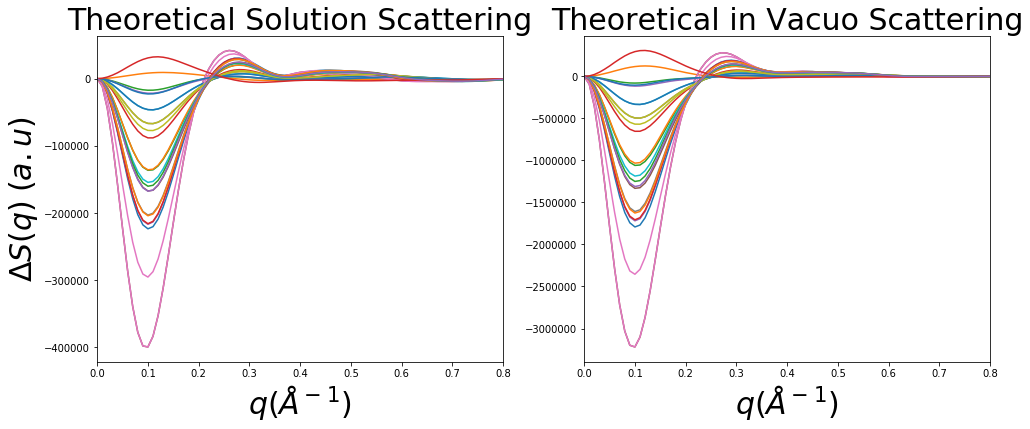

In [241]:
fig = plt.figure(figsize=(16,6))

ax = fig.add_subplot(121)
plt.xlim(0,0.8)
plt.plot(q_frame,dItS)
plt.xlabel('$q(Å{^-}^{1})$', fontsize=30)
plt.ylabel('$\Delta S(q)\;(a.u)$',fontsize=30)
plt.title('Theoretical Solution Scattering',fontsize=30)

ax = fig.add_subplot(122)
plt.xlim(0,0.8)
plt.plot(q_frame,dIvS)
plt.xlabel('$q(Å{^-}^{1})$',fontsize=30)
#plt.ylabel('$\Delta S(q)\;(a.u)$',fontsize=30);
plt.title('Theoretical in Vacuo Scattering',fontsize=30);




### Calculate mean difference scattering over the 25 interpolations

In [157]:
tot_scatt_mean = np.mean(dItS,axis=1)
tot_scatt_mean;



In [156]:
vac_scatt_mean = np.mean(dIvS,axis=1)
vac_scatt_mean;

### Plotting mean difference scattering 

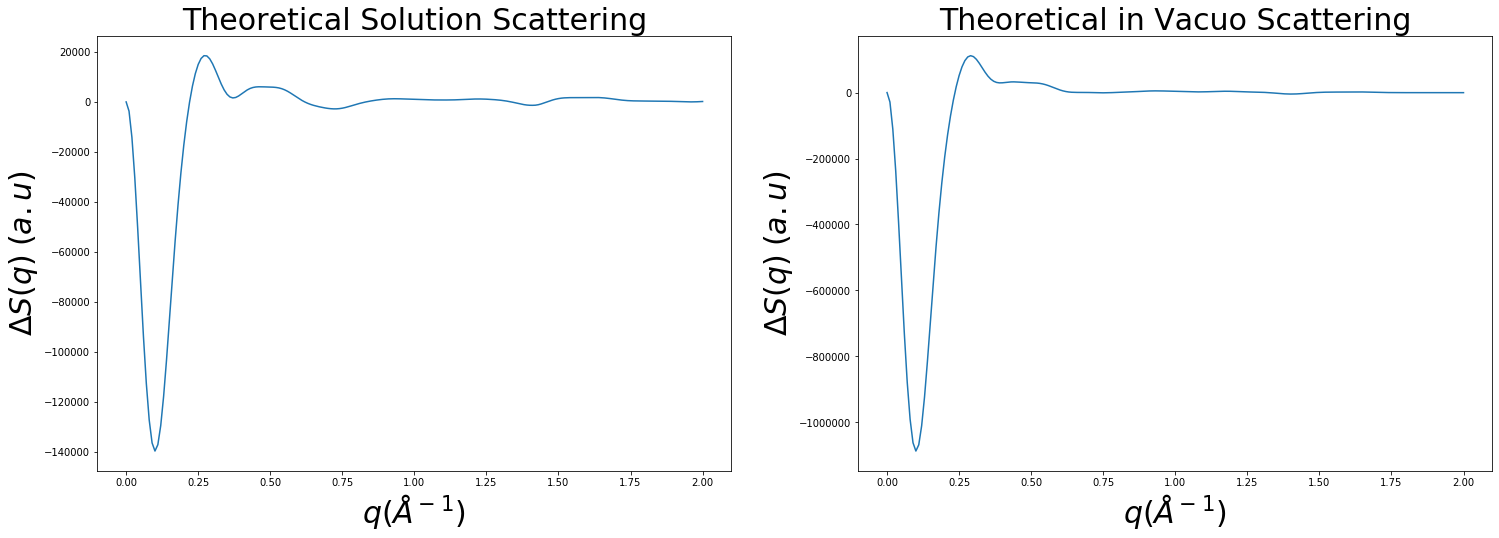

In [204]:
fig = plt.figure(figsize=(25,8))

ax = fig.add_subplot(121)
#plt.xlim(0,0.8)
#plt.subplot(121)
plt.plot(q_frame,tot_scatt_mean)
plt.xlabel('$q(Å{^-}^{1})$', fontsize=30)
plt.ylabel('$\Delta S(q)\;(a.u)$',fontsize=30)
plt.title('Theoretical Solution Scattering',fontsize=30)

ax = fig.add_subplot(122)
#plt.xlim(0,0.8)
#plt.subplot(122)
plt.plot(q_frame,vac_scatt_mean)
plt.xlabel('$q(Å{^-}^{1})$',fontsize=30)
plt.ylabel('$\Delta S(q)\;(a.u)$',fontsize=30);
plt.title('Theoretical in Vacuo Scattering',fontsize=30);



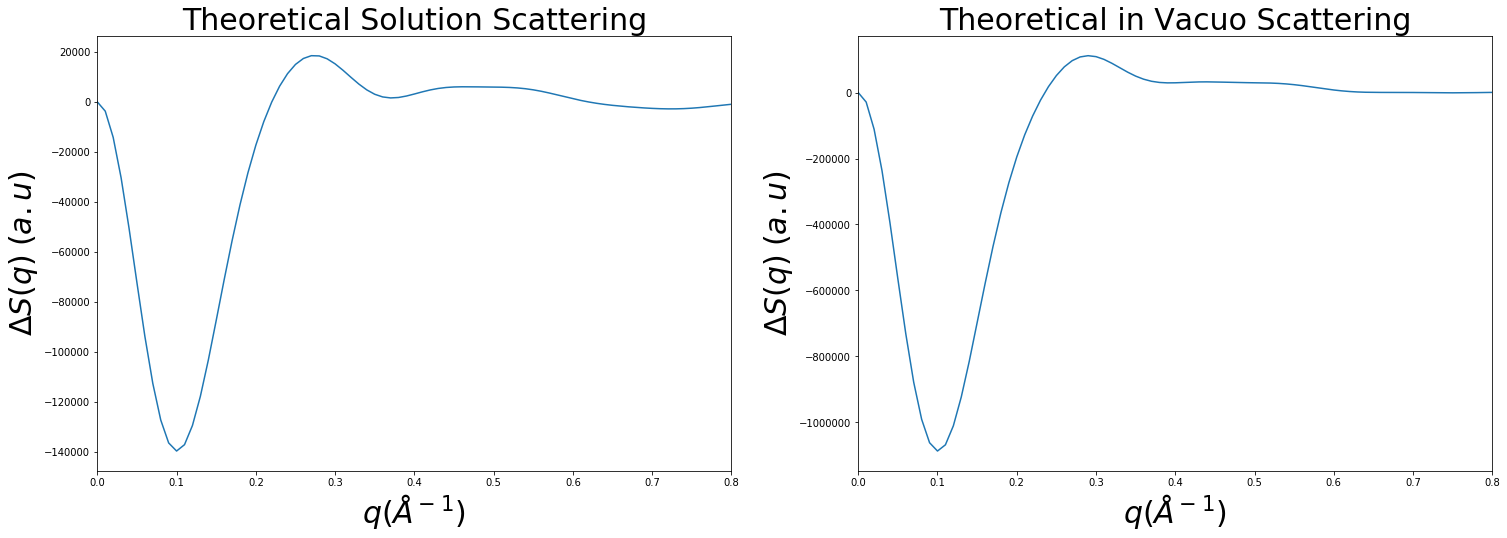

In [206]:
fig = plt.figure(figsize=(25,8))

ax = fig.add_subplot(121)
plt.xlim(0,0.8)
#plt.subplot(121)
plt.plot(q_frame,tot_scatt_mean)
plt.xlabel('$q(Å{^-}^{1})$', fontsize=30)
plt.ylabel('$\Delta S(q)\;(a.u)$',fontsize=30)
plt.title('Theoretical Solution Scattering',fontsize=30)

ax = fig.add_subplot(122)
plt.xlim(0,0.8)
#plt.subplot(122)
plt.plot(q_frame,vac_scatt_mean)
plt.xlabel('$q(Å{^-}^{1})$',fontsize=30)
plt.ylabel('$\Delta S(q)\;(a.u)$',fontsize=30);
plt.title('Theoretical in Vacuo Scattering',fontsize=30);